In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day25-normalization/wine_data.csv',header=None, usecols=[0,1,2])
df.columns = ['Class label', 'Alcohol', 'Malic acid']

In [40]:
df.shape

(178, 3)

In [20]:
df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

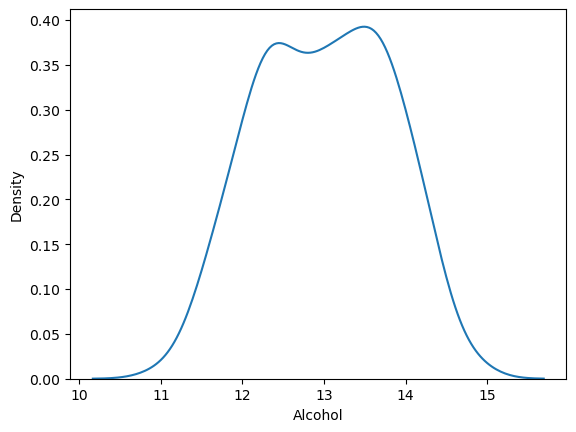

In [22]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

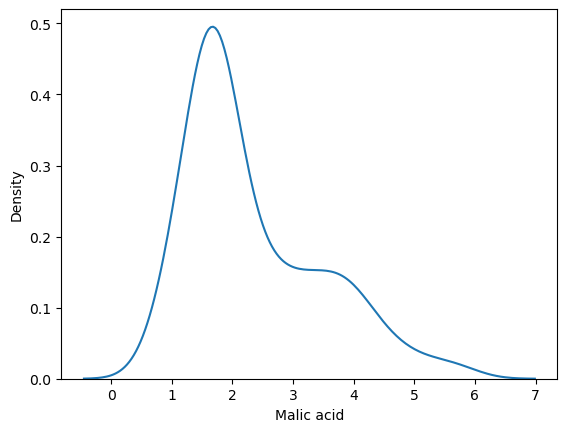

In [24]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

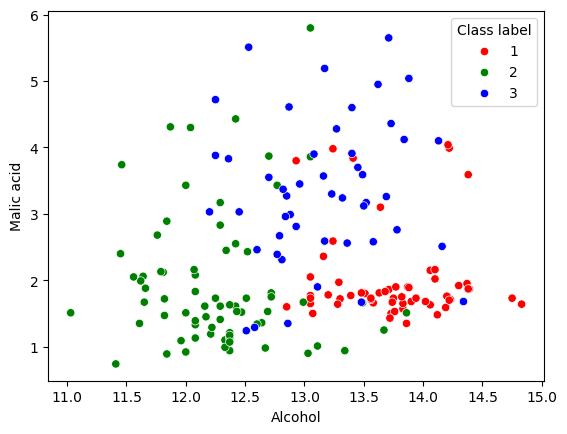

In [30]:
color_dict = {1: 'red', 2: 'green', 3:'blue'}

sns.scatterplot(x = df['Alcohol'], y= df['Malic acid'] , hue = df['Class label'] , palette = color_dict)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('Class label', axis = 1),
                                                   df['Class label'],
                                                   test_size = 0.3,
                                                   random_state = 0)

X_train.shape , X_test.shape

((124, 2), (54, 2))

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [56]:
np.round(X_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [58]:
np.round(X_test_scaled.describe() , 1)

,Alcohol,Malic acid
count,54.0,54.0
mean,0.5,0.3
std,0.2,0.2
min,0.1,-0.0
25%,0.4,0.1
50%,0.5,0.2
75%,0.7,0.4
max,1.0,1.0


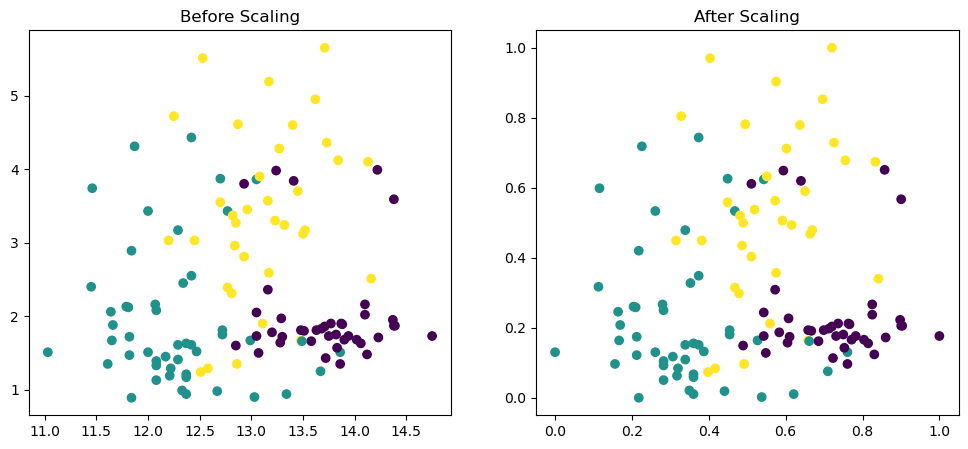

In [68]:
fig, (ax1, ax2) = plt.subplots(ncols= 2 , figsize=(12,5))

ax1.scatter(x = X_train['Alcohol'], y= X_train['Malic acid'], c= Y_train)
ax1.set_title('Before Scaling')

ax2.scatter(x = X_train_scaled['Alcohol'], y = X_train_scaled['Malic acid'], c=Y_train)
ax2.set_title('After Scaling')

plt.show()

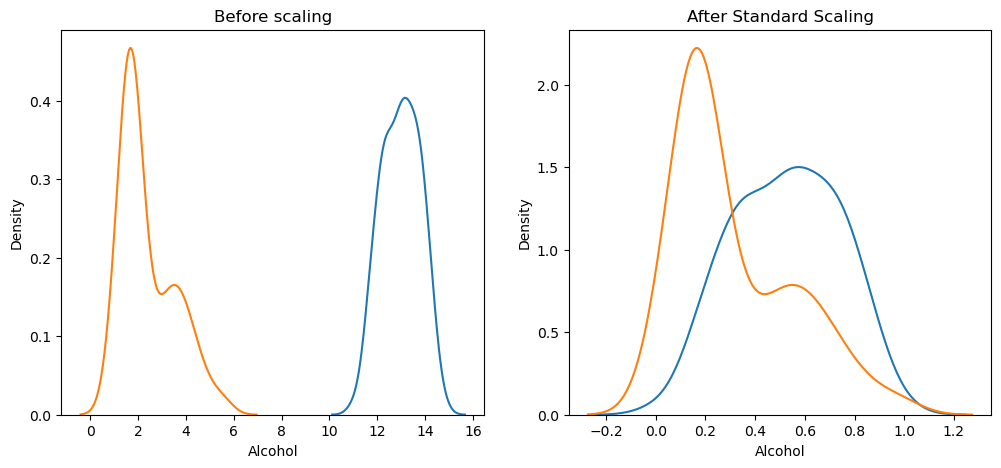

In [72]:
fig, (ax1, ax2) = plt.subplots(ncols= 2, figsize=(12, 5))

sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)
ax1.set_title('Before scaling')

sns.kdeplot(X_train_scaled['Alcohol'], ax= ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax= ax2)
ax2.set_title('After Standard Scaling')

plt.show()

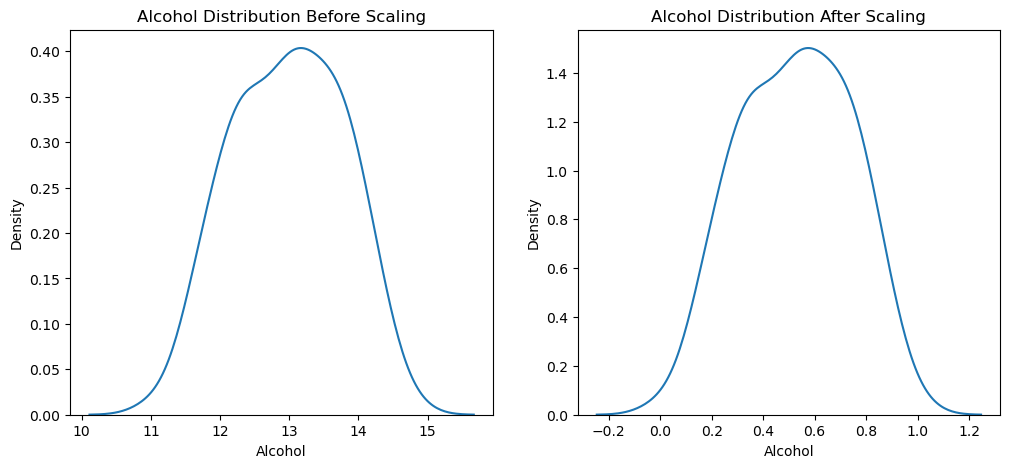

In [74]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize= (12,5))

sns.kdeplot(X_train['Alcohol'], ax=ax1)
ax1.set_title('Alcohol Distribution Before Scaling')

sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
ax2.set_title('Alcohol Distribution After Scaling')

plt.show()

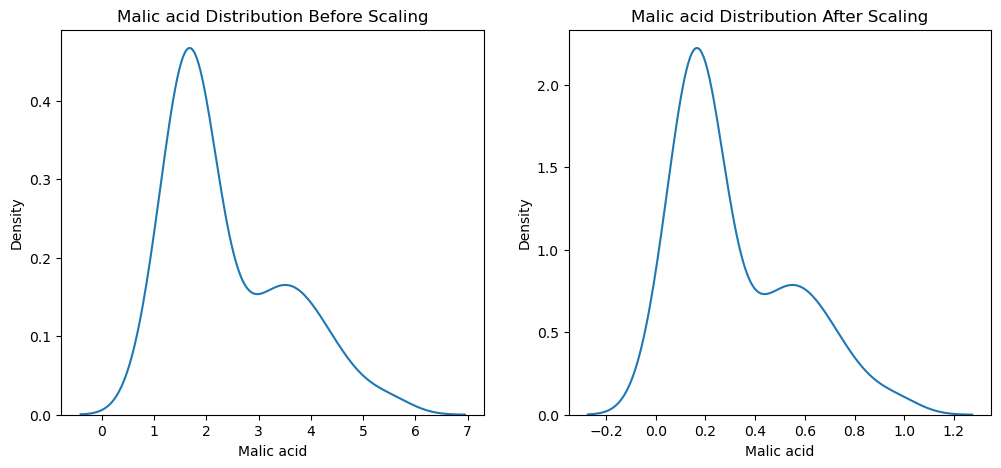

In [76]:
fig, (ax1, ax2)= plt.subplots(ncols=2, figsize=(12,5))

sns.kdeplot(X_train['Malic acid'], ax= ax1)
ax1.set_title('Malic acid Distribution Before Scaling')

sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
ax2.set_title('Malic acid Distribution After Scaling')
plt.show()